In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
import numpy as np

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"
!ls "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom  'Colab Notebooks'   Videos	 Папка	 проекти
'Copy of featuretools.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 Homework_1.ipynb
 Homework4.ipynb
'hw_pandas (1).ipynb'
 hw_pandas.ipynb
 player_data.csv
 Players.csv
 Seasons_Stats.csv
'topic2_practice_visual_titanic_solution (1).ipynb'
 topic2_practice_visual_titanic_solution.ipynb
 Untitled0.ipynb
 Untitled2.ipynb


In [ ]:
data_players = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Players.csv')
data_players.head()


Unnamed: 0           Player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky

In [ ]:
data_players.describe(include="all")

Unnamed: 0           Player       height       weight  \
count   3922.000000             3921  3921.000000  3921.000000   
unique          NaN             3921          NaN          NaN   
top             NaN  Curly Armstrong          NaN          NaN   
freq            NaN                1          NaN          NaN   
mean    1960.500000              NaN   198.704922    94.783219   
std     1132.328206              NaN     9.269761    12.039515   
min        0.000000              NaN   160.000000    60.000000   
25%      980.250000              NaN   190.000000    86.000000   
50%     1960.500000              NaN   198.000000    95.000000   
75%     2940.750000              NaN   206.000000   102.000000   
max     3921.000000              NaN   231.000000   163.000000   

                       collage        born birth_city birth_state  
count                     3573  3921.00000       3452        3439  
unique                     422         NaN       1264         128  
top     University of Kentucky         NaN    Chicago  California  
freq                        89         NaN        114         344  
mean                       NaN  1962.37975        NaN         NaN  
std                        NaN    20.33491        NaN         NaN  
min                        NaN  1913.00000        NaN         NaN  
25%                        NaN  1948.00000        NaN         NaN  
50%                        NaN  1964.00000        NaN         NaN  
75%                        NaN  1979.00000        NaN         NaN  
max                        NaN  1997.00000        NaN         NaN

In [ ]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [ ]:
data_players.shape

(3922, 8)

Из данных которые находяться в данном датасете, можно проанализировать данные по росту и весу.

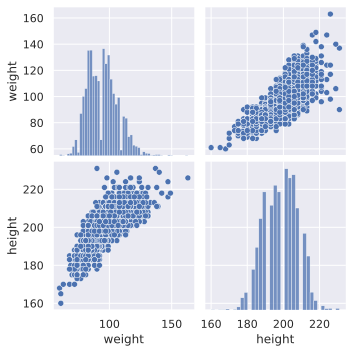

In [ ]:
sns.pairplot(data_players[['weight',  'height']]);

Здесь я пытаюсь увидеть как зависят рост и вес игроков. Могу сказать что в датасете по графикам по описанию датасета вижу что вес игроков не привышает значений 163кг а рост 2m31sm  В основном чем больше рост, тем больше вес. Хотя тут присутсвует и корреляция(как я понимаю), поскольку есть вероятность выпадения данных из этого правила.

Как рост  зависит от веса


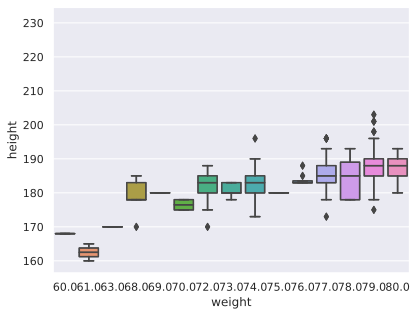

In [ ]:
sns.boxplot(x="weight", y="height", data=data_players);
sns.boxplot(
    x="weight",
    y="height",
    data=data_players[data_players["weight"] < data_players["weight"].quantile(0.1)],
);

Если я правильно поняла для чего боксплот строиться, то тут мы можем отследить вероятность того, что  при определенном весе рост игрока будет такой-то рост
Например при весе 74 кг видим , что медиана боксплота соответсвует где-то 184см
минимальное значение соответсвует росту  приблизительно 174см , максимальное значение роста приблизительно 187см. Вероятность того, что при весе в 74 кг рост будет 182см ниже, чем что рост будет 185см
Есть один аутлеер на росте приблизительно 196см


In [ ]:
data_players["collage"] = data_players["collage"].apply(
    lambda collage: 1 if collage =='University of Kentucky' else 2
);
data_players.head(300)

Unnamed: 0           Player  height  weight  collage    born  \
0             0  Curly Armstrong   180.0    77.0        2  1918.0   
1             1     Cliff Barker   188.0    83.0        1  1921.0   
2             2    Leo Barnhorst   193.0    86.0        2  1924.0   
3             3       Ed Bartels   196.0    88.0        2  1925.0   
4             4      Ralph Beard   178.0    79.0        1  1927.0   
..          ...              ...     ...     ...      ...     ...   
295         295     Jim Holstein   190.0    81.0        2  1930.0   
296         296  Bob Lochmueller   196.0    83.0        2  1927.0   
297         297       Mo Mahoney   188.0    92.0        2  1927.0   
298         298        Al Masino   178.0    78.0        2  1928.0   
299         299   Jack McCloskey   188.0    86.0        2  1925.0   

       birth_city   birth_state  
0             NaN           NaN  
1        Yorktown       Indiana  
2             NaN           NaN  
3             NaN           NaN  
4     Hardinsburg      Kentucky  
..            ...           ...  
295           NaN           NaN  
296           NaN           NaN  
297           NaN           NaN  
298           NaN           NaN  
299  Mahanoy City  Pennsylvania  

[300 rows x 8 columns]

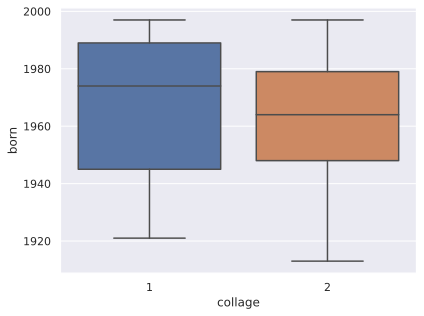

In [ ]:
sns.boxplot(x="collage", y="born", data=data_players);

ВОПРОС! если например я хочу проанализировать вероятность того что игроки, которые обучались в University of Kentucky родились с 1920 по 2000 года и построить для этоко боксплот, но данные в колонке датасета college не численные, имею ли я право перевести их в численную форму с помощью функции(как я сделала вверху)?

По боксплоту видно , что самые старые игроки которые обучались в данном университете родились в 1921 году а самые молодые где-то в 1998
Вероятность того что  игроки, которые обучались в University of Kentucky родились  c 1943 по 1972 больше чем вероятность что они родились с 1977 по 1999

In [ ]:
data_player_pl = pd.read_csv('/content/drive/My Drive/Colab Notebooks/player_data.csv')
data_player_pl.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [ ]:
data_player_pl.fillna(0)
data_player_pl.describe(include="all")

name   year_start     year_end     position height  \
count             4550  4550.000000  4550.000000  4550.000000   4549   
unique            4500          NaN          NaN          NaN     28   
top     George Johnson          NaN          NaN          NaN    6-7   
freq                 3          NaN          NaN          NaN    473   
mean               NaN  1985.076264  1989.272527     0.085275    NaN   
std                NaN    20.974188    21.874761     0.279321    NaN   
min                NaN  1947.000000  1947.000000     0.000000    NaN   
25%                NaN  1969.000000  1973.000000     0.000000    NaN   
50%                NaN  1986.000000  1992.000000     0.000000    NaN   
75%                NaN  2003.000000  2009.000000     0.000000    NaN   
max                NaN  2018.000000  2018.000000     1.000000    NaN   

             weight        birth_date                 college  
count   4544.000000              4519                    4248  
unique          NaN              4161                     473  
top             NaN  October 25, 1948  University of Kentucky  
freq            NaN                 3                      99  
mean     208.908011               NaN                     NaN  
std       26.268662               NaN                     NaN  
min      114.000000               NaN                     NaN  
25%      190.000000               NaN                     NaN  
50%      210.000000               NaN                     NaN  
75%      225.000000               NaN                     NaN  
max      360.000000               NaN                     NaN

In [ ]:
data_player_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4550 non-null   int64  
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 284.5+ KB


In [ ]:
data_player_pl["position"] = data_player_pl["position"].apply(
    lambda position: 1 if position =='F-C' else 0
);
data_player_pl.head(300)

name  year_start  year_end  position height  weight  \
0         Alaa Abdelnaby        1991      1995         1   6-10   240.0   
1        Zaid Abdul-Aziz        1969      1978         0    6-9   235.0   
2    Kareem Abdul-Jabbar        1970      1989         0    7-2   225.0   
3     Mahmoud Abdul-Rauf        1991      2001         0    6-1   162.0   
4      Tariq Abdul-Wahad        1998      2003         0    6-6   223.0   
..                   ...         ...       ...       ...    ...     ...   
295      Winston Bennett        1990      1992         0    6-7   210.0   
296         David Benoit        1992      2001         0    6-8   220.0   
297         Keith Benson        2012      2012         0   6-11   240.0   
298          Kent Benson        1978      1988         0   6-10   235.0   
299           Ben Bentil        2017      2017         0    6-9   235.0   

            birth_date                                college  
0        June 24, 1968                        Duke University  
1        April 7, 1946                  Iowa State University  
2       April 16, 1947  University of California, Los Angeles  
3        March 9, 1969             Louisiana State University  
4     November 3, 1974              San Jose State University  
..                 ...                                    ...  
295   February 9, 1965                 University of Kentucky  
296        May 9, 1968                  University of Alabama  
297    August 13, 1988                     Oakland University  
298  December 27, 1954                     Indiana University  
299     March 29, 1995                     Providence College  

[300 rows x 8 columns]

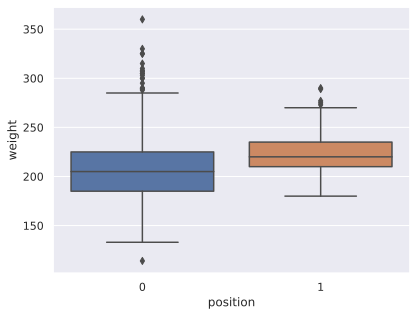

In [ ]:
sns.boxplot(x="position", y="weight", data=data_player_pl);

По боксплоту видно , что вероятность что игроки которые имеют позицию F-C в игре будут иметь  вес от 210 фунтов до 225 фунтов  меньше, чем от 225 до 240 фунтов, также вероятность того что что игроки которые имеют  позиции отличные от  F-C в игре будут иметь  вес от 165 фунтов до 210 фунтов  равна, вероятности 210 до 230 фунтов

In [ ]:
data_player_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Seasons_Stats.csv')
data_player_data.head()

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   
3           3  1950.0       Ed Bartels    F  24.0  TOT  15.0 NaN NaN  NaN   
4           4  1950.0       Ed Bartels    F  24.0  DNN  13.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 53 columns]

In [ ]:
data_player_data.fillna(data_player_data.mean())
data_player_data.describe(include="all")

<ipython-input-168-065ecb8db7bf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_player_data.fillna(data_player_data.mean())


Unnamed: 0          Year         Player    Pos           Age     Tm  \
count   24691.000000  24624.000000          24624  24624  24616.000000  24624   
unique           NaN           NaN           3921     23           NaN     69   
top              NaN           NaN  Eddie Johnson     PF           NaN    TOT   
freq             NaN           NaN             33   4966           NaN   2123   
mean    12345.000000   1992.594989            NaN    NaN     26.664405    NaN   
std      7127.822084     17.429594            NaN    NaN      3.841892    NaN   
min         0.000000   1950.000000            NaN    NaN     18.000000    NaN   
25%      6172.500000   1981.000000            NaN    NaN     24.000000    NaN   
50%     12345.000000   1996.000000            NaN    NaN     26.000000    NaN   
75%     18517.500000   2007.000000            NaN    NaN     29.000000    NaN   
max     24690.000000   2017.000000            NaN    NaN     44.000000    NaN   

                   G            GS            MP           PER  ...  \
count   24624.000000  18233.000000  24138.000000  24101.000000  ...   
unique           NaN           NaN           NaN           NaN  ...   
top              NaN           NaN           NaN           NaN  ...   
freq             NaN           NaN           NaN           NaN  ...   
mean       50.837110     23.593375   1209.720317     12.479071  ...   
std        26.496161     28.632387    941.146575      6.039014  ...   
min         1.000000      0.000000      0.000000    -90.600000  ...   
25%        27.000000      0.000000    340.000000      9.800000  ...   
50%        58.000000      8.000000   1053.000000     12.700000  ...   
75%        75.000000     45.000000   1971.000000     15.600000  ...   
max        88.000000     83.000000   3882.000000    129.100000  ...   

                 FT%           ORB           DRB           TRB           AST  \
count   23766.000000  20797.000000  20797.000000  24312.000000  24624.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.719279     62.189210    147.199404    224.637381    114.852623   
std         0.141824     67.324881    145.921912    228.190203    135.863913   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.657000     12.000000     33.000000     51.000000     19.000000   
50%         0.743000     38.000000    106.000000    159.000000     68.000000   
75%         0.808000     91.000000    212.000000    322.000000    160.000000   
max         1.000000    587.000000   1111.000000   2149.000000   1164.000000   

                 STL           BLK           TOV            PF           PTS  
count   20797.000000  20797.000000  19645.000000  24624.000000  24624.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean       39.897052     24.470260     73.939832    116.339222    510.116350  
std        38.713053     36.935084     67.713803     84.791873    492.922981  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         9.000000      3.000000     18.000000     39.000000    106.000000  
50%        29.000000     11.000000     55.000000    109.000000    364.000000  
75%        60.000000     29.000000    112.000000    182.000000    778.000000  
max       301.000000    456.000000    464.000000    386.000000   4029.000000  

[11 rows x 53 columns]

In [ ]:
data_player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [ ]:
data_player_data.shape

(24691, 53)

In [ ]:
sns.pairplot(data_player_data[["PER", 'G' ]]);

Хочу построить зависимость рейтинга эффективности игроков  от количества игр где они учавсвавали
как я понимаю логически и ка впринципе вижу на графике чем больше игрок проходит игр , тем процент рейтинга идет от минусового к плюсу,

ВОПРОС! я вижу так же что внизу рафика есть распределение точек где игроки, сразу играя мало совсем игр имеют рейтинг плюсовой и большой. Это можно считать аутлетами? или просто например туда могди попасть игроки которые были куплены в других командах и были сразу уже опытными?
ил я вообще делаю не верные выводы и не верно выбираю данные которые пытаюсь анализировать? подскажите пожалуйста. А то я чувсвую , что пишу полный бред:))